### Student Information
Name:陳柏昇

Student ID:111062567

GitHub ID:YESHA1

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

---

---

In [2]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data
 

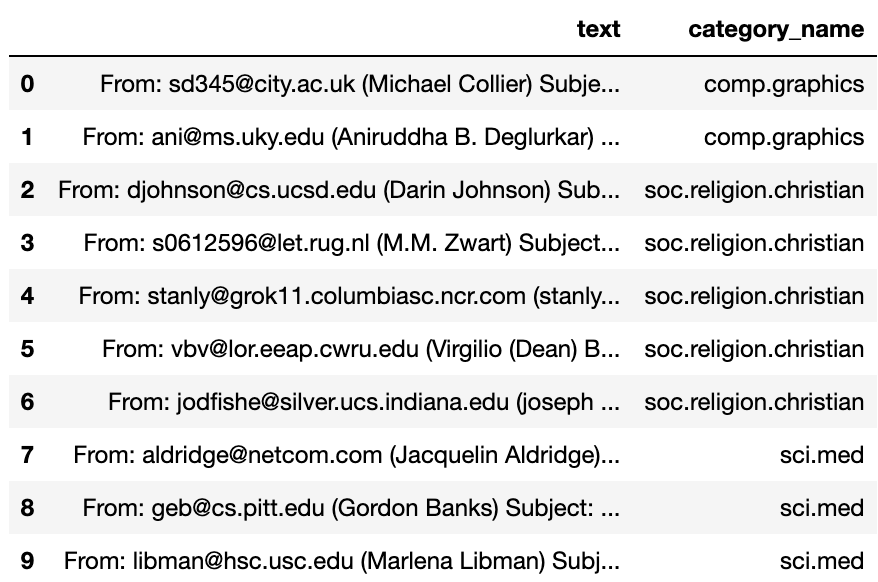

---

## 2. Data Preparation


In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [5]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

**Note** the `twenty_train` is just a bunch of objects that can be accessed as python dictionaries; so, you can do the following operations on `twenty_train`

In [6]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [7]:
len(twenty_train.data)

2257

In [8]:
len(twenty_train.filenames)

2257

#### We can also print an example from the subset

In [9]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



... and determine the label of the example via `target_names` key value

In [10]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [11]:
twenty_train.target[0]

1

... we can also get the category of 10 documents via `target` key value 

In [12]:
# category of first 10 documents.
twenty_train.target[:10] #0~9

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

**Note:** As you can observe, both approaches above provide two different ways of obtaining the `category` value for the dataset. Ideally, we want to have access to both types -- numerical and nominal -- in the event some particular library favors a particular type. 

As you may have already noticed as well, there is no **tabular format** for the current version of the data. As data miners, we are interested in having our dataset in the most convenient format as possible; something we can manipulate easily and is compatible with our algorithms, and so forth.

Here is one way to get access to the *text* version of the label of a subset of our training data:

In [13]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


---

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [14]:
# Answer here
for t in range(0,3):
    print("*"*50)
    print("\n".join(twenty_train.data[t].split("\n")))

**************************************************
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

**************************************************
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope so

---

## 3. Data Transformation


---

### 3.1 Converting Dictionary into Pandas Dataframe


In [15]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [16]:
len(X)

2257

In [17]:
X[0:2]

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...


In [18]:
for t in X["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

### Adding Columns

In [19]:
# add category to the dataframe
X['category'] = twenty_train.target

In [20]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

Now we can print and see what our table looks like. 

In [21]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


---

### 3.2 Familiarizing yourself with the Data

In [22]:
# a simple query
X[:10][["text","category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [23]:
X[-10:]

,text,category,category_name
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [24]:
# using loc (by label)
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [25]:
# using iloc (by position)
X.iloc[:10, 0]   

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [26]:
#Answer here
#first Dataframe.at which can display the target element
X.at[5,"text"]

#second
X.iat[5,0] #By index to access "text"

'From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B. Velasco Jr.) Subject: Re: The arrogance of Christians Organization: Case Western Reserve Univ. Cleveland, Ohio (USA) Lines: 28  In article <Apr.22.00.56.15.1993.2073@geneva.rutgers.edu> hayesstw@risc1.unisa.ac.za (Steve Hayes) writes:  >A similar analogy might be a medical doctor who believes that a blood  >transfusion is necessary to save the life of a child whose parents are  >Jehovah\'s Witnesses and so have conscientious objections to blood  >transfusion. The doctor\'s efforts to persuade them to agree to a blood  >transfusion could be perceived to be arrogant in precisely the same way as  >Christians could be perceived to be arrogant.  >The truth or otherwise of the belief that a blood transfusion is necessary  >to save the life of the child is irrelevant here. What matters is that the  >doctor BELIEVES it to be true, and could be seen to be trying to foce his  >beliefs on the parents, and this could well be perceived as arrogance. 

---

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [27]:
# Answer here
X[X['category_name']=='sci.med'].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [28]:
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2252,False,False,False
2253,False,False,False
2254,False,False,False
2255,False,False,False


In [29]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


---

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [30]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

---

In [31]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [32]:
dummy_series

text        dummy_record
category               1
dtype: object

In [33]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,category
0,dummy_record,1


In [34]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [35]:
# check if the records was commited into result
len(result_with_series)

2258

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [36]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [37]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [38]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [39]:
len(X)

2258

In [40]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [41]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [42]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [43]:
len(X)

2257

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [44]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [45]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [46]:
# Answer here
#sorry about that I can't use english to clearly show my view point. I need to type chinese
'''
因為 isnull()的函數是用來檢測欄位內是否有值，
A給定的是np.nan會被視為空值所以是true
B沒有資料所以是true
c是手動type nan 所以不是空值為false
d是手動type none 所以不是空值為false
e none在python中被視為特殊值(空值)所以會回傳true
f ''這不代表是空值算是一個空字元，故isnull會回傳false 
'''

"\n因為 isnull()的函數是用來檢測欄位內是否有值，\nA給定的是np.nan會被視為空值所以是true\nB沒有資料所以是true\nc是手動type nan 所以不是空值為false\nd是手動type none 所以不是空值為false\ne none在python中被視為特殊值(空值)所以會回傳true\nf ''這不代表是空值算是一個空字元，故isnull會回傳false \n"

---

In [47]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [48]:
sum(X.duplicated())

0

In [49]:
sum(X.duplicated('text'))

0

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [50]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [51]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [52]:
len(X)

2259

In [53]:
sum(X.duplicated('text'))

1

# 這裡是第一個我覺得處理上可以改一下的地方
這裡因為展示duplicate的處理，所以我們自己建了一筆資料，然後複製他並且concate到原本的資料集，最後用drop，把兩筆都刪除
但實際上當我們碰到的時候，可以把keep欄位改成true，這樣可以只刪除其中一筆，保留另外一筆

In [54]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [55]:
len(X)

2257

---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling


In [56]:
X_sample = X.sample(n=1000) #random state

In [57]:
len(X_sample)

1000

In [58]:
X_sample[0:4]

,text,category,category_name
96,From: orourke@sophia.smith.edu (Joseph O'Rourk...,1,comp.graphics
195,From: CBW790S@vma.smsu.edu.Ext (Corey Webb) Su...,1,comp.graphics
1148,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
270,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,3,soc.religion.christian


---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [59]:
# Answer here
'''
我不確定這邊是要問那裡的X so 我分兩部分說明:
1.從sampling這邊來看X_sample取得的是隨機抽樣所以與一開始的X不同點在於順序。
2.若是從duplication開始的話，我們可以看到在concat之後後面多了兩筆dummy資料，
之後經過drop處理後一次刪除了這兩筆data所以又變回了原本的X
'''

'\n我不確定這邊是要問那裡的X so 我分兩部分說明:\n1.從sampling這邊來看X_sample取得的是隨機抽樣所以與一開始的X不同點在於順序。\n2.若是從duplication開始的話，我們可以看到在concat之後後面多了兩筆dummy資料，\n之後經過drop處理後一次刪除了這兩筆data所以又變回了原本的X\n'

---

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

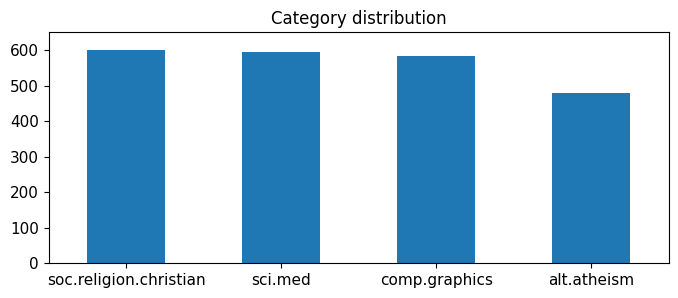

In [62]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

soc.religion.christian    271
sci.med                   263
comp.graphics             260
alt.atheism               206
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

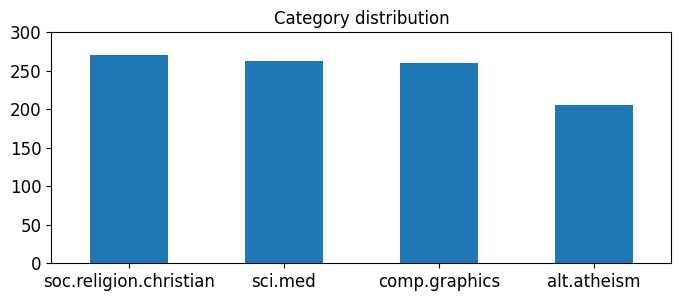

In [63]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

---

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

271
soc.religion.christian    271
sci.med                   263
comp.graphics             260
alt.atheism               206
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

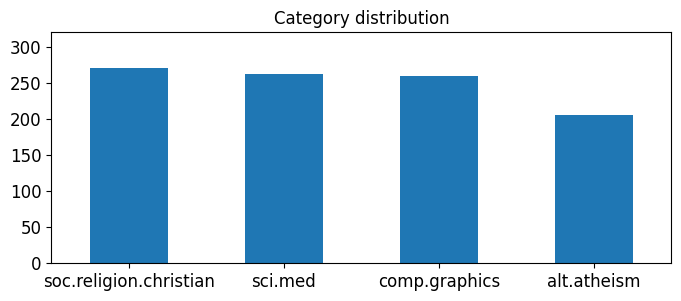

In [64]:
# Answer here
print(X_sample.category_name.value_counts().max())
max=X_sample.category_name.value_counts().max()
# plot barchart for X_sample
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max+50], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

280
soc.religion.christian    280
comp.graphics             261
sci.med                   253
alt.atheism               206
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

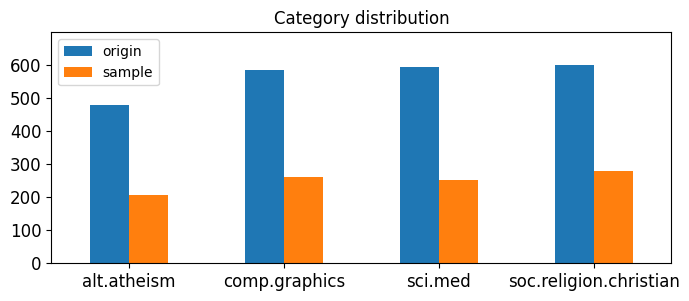

In [65]:
# Answer here
#分開長條圖
X_sample2=X.sample(n=1000) #多取一組sample來做比較
print(X_sample2.category_name.value_counts().max())
print(X_sample2.category_name.value_counts())

disp = pd.concat([X.category_name.value_counts(), X_sample2.category_name.value_counts()], axis=1, sort=True)
disp.columns = ["origin", "sample"]

disp.plot(kind = 'bar',title = 'Category distribution',ylim = [0, X.category_name.value_counts().max()+100]
         ,rot = 0, fontsize = 12, figsize = (8,3))


---

### 5.2 Feature Creation


In [66]:
import nltk

In [67]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [68]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [69]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [70]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


What we did with those two lines of code is that we transformed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [72]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [73]:
# Answer here
analyze(X["text"][0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---

In [74]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [75]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

In [76]:
X_counts.shape

(2257, 35788)

In [77]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [78]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [79]:
# Answer here
for t in X_counts[4, 0:100].toarray(): #取出第5筆document data 的前100 term 只要不等於0 就output 相當於只要有出現我們就輸出對應的字 
                                       #time complexity 約 O(N) 
    i=0
    for y in t: #在document data中 找非0
        #print(y)
        if(y!=0):
            #print(i)
            print('term is '+count_vect.get_feature_names_out()[i])
        i+=1

term is 00
term is 01


---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [80]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [81]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [82]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

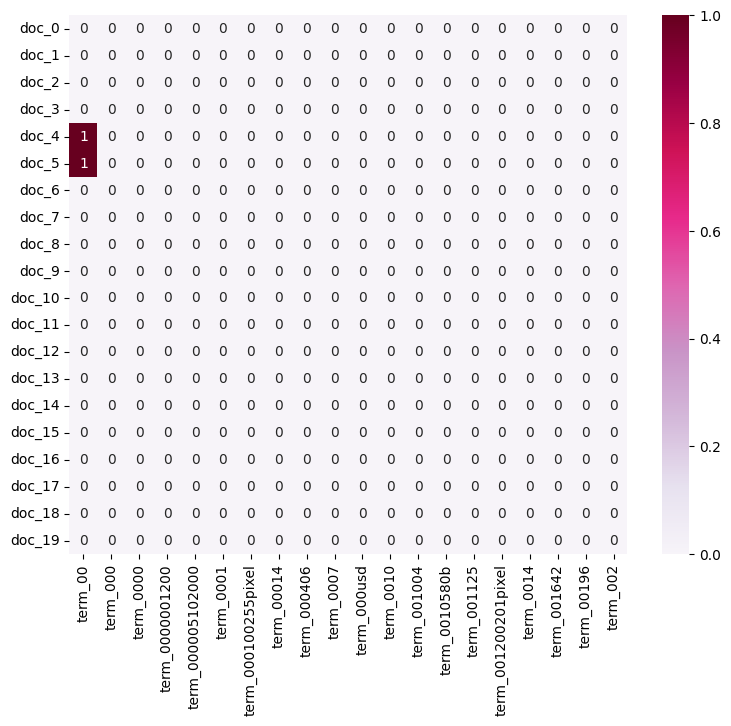

In [83]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# 這裡是我認為的第二個地方，正如題目所說，這樣印出許多0非常的沒有效率
，改進方法也在下面實現了，EXERCISE 11

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [84]:
# Answer here
#我的想法是 先透過排序找出前100在所有文本中最常出現的字，然後印出前一100筆資料中這些字出現的次數，有助於我們了解說那些字真正會影響到分類
arr_X=X_counts.toarray()
X_F=arr_X.tolist()

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
X_F.insert(0,term_frequencies)
X_F.insert(0,count_vect.get_feature_names_out())

ans_df=pd.DataFrame(X_F) #先把X_F轉DF 方便我做排序
ans_df.index=['doc'+str(i-2) for i in range(2259)] 

rslt_df = ans_df.sort_values(by = ['doc-1'], axis = 1,ascending = False) #排序好後可以得到RSLT_DF
rslt_df

,32142,23610,32493,4992,18474,17556,32139,18551,35638,14601,...,24656,24657,24658,24659,24660,24661,24662,24663,24664,35787
doc-2,the,of,to,and,is,in,that,it,you,for,...,pc386,pc5_b109,pc9_b109,pca,pcad3d,pcb,pcboard,pccvm,pcd7,íålittin
doc-1,[29825],[17660],[17222],[13017],[12343],[11226],[10723],[8447],[6157],[5962],...,[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]
doc0,5,1,4,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1,11,8,4,0,10,2,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
doc2,14,10,26,9,4,6,8,8,13,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc2252,0,4,0,1,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
doc2253,63,40,32,48,17,22,5,9,5,14,...,0,0,0,0,0,0,0,0,0,0
doc2254,26,17,13,12,14,3,11,5,3,3,...,0,0,0,0,0,0,0,0,0,0
doc2255,123,68,64,59,23,24,8,14,50,32,...,0,0,0,0,0,0,0,0,0,0


In [85]:
plot_x = ["term_"+str(i) for i in rslt_df.loc['doc-2'][0:50]]  #取前50筆資料來看
plot_y = ["doc_"+ str(i-2) for i in list(X.index)[2:52]]
plot_z = rslt_df.iloc[2:52, 0:50].to_numpy()
plot_x

C:\Users\oscar\AppData\Local\Temp\ipykernel_4588\2255195605.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plot_x = ["term_"+str(i) for i in rslt_df.loc['doc-2'][0:50]]  #取前50筆資料來看


['term_the',
 'term_of',
 'term_to',
 'term_and',
 'term_is',
 'term_in',
 'term_that',
 'term_it',
 'term_you',
 'term_for',
 'term_not',
 'term_this',
 'term_be',
 'term_from',
 'term_are',
 'term_edu',
 'term_have',
 'term_as',
 'term_on',
 'term_with',
 'term_but',
 'term_or',
 'term_if',
 'term_was',
 'term_can',
 'term_we',
 'term_there',
 'term_by',
 'term_what',
 'term_subject',
 'term_they',
 'term_an',
 'term_lines',
 'term_one',
 'term_he',
 'term_god',
 'term_do',
 'term_organization',
 'term_at',
 'term_re',
 'term_com',
 'term_about',
 'term_my',
 'term_all',
 'term_would',
 'term_will',
 'term_so',
 'term_some',
 'term_your',
 'term_no']

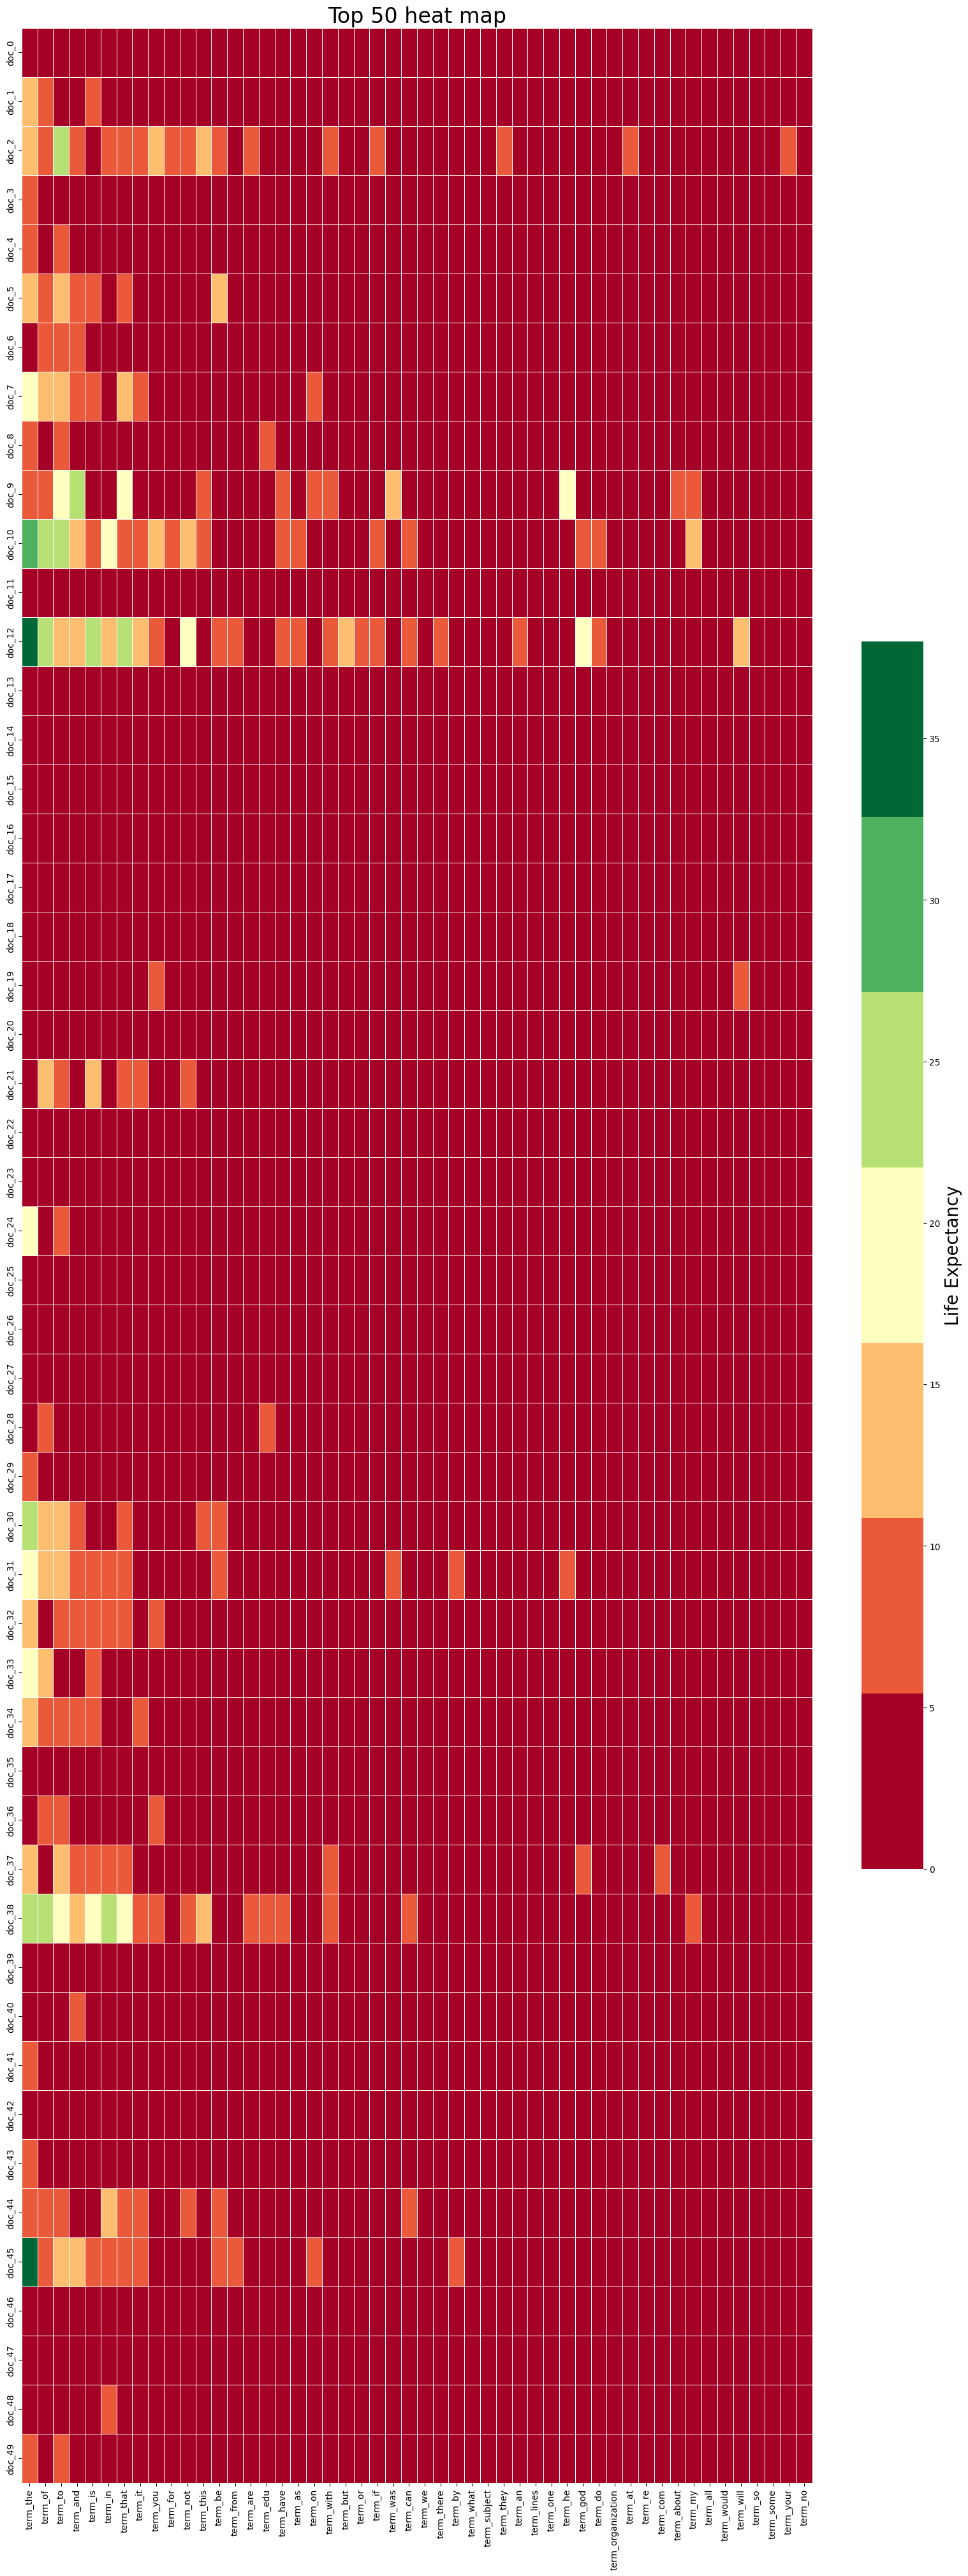

In [86]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw=df_todraw.astype('int') 


plt.figure(figsize = [20, 50]) #設定畫布大小

title = 'Top 50 heat map'
plt.title(title,fontsize=24)
ax = sns.heatmap(df_todraw, fmt='f', linewidths = .5,
                 cmap = plt.cm.get_cmap('RdYlGn', 7), cbar_kws={
                     'label': 'Life Expectancy', 'shrink': 0.5})

ax.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

---

---

### 5.4 Dimensionality Reduction


[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [87]:
from sklearn.decomposition import PCA

In [88]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [89]:
X_reduced.shape

(2257, 2)

In [90]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

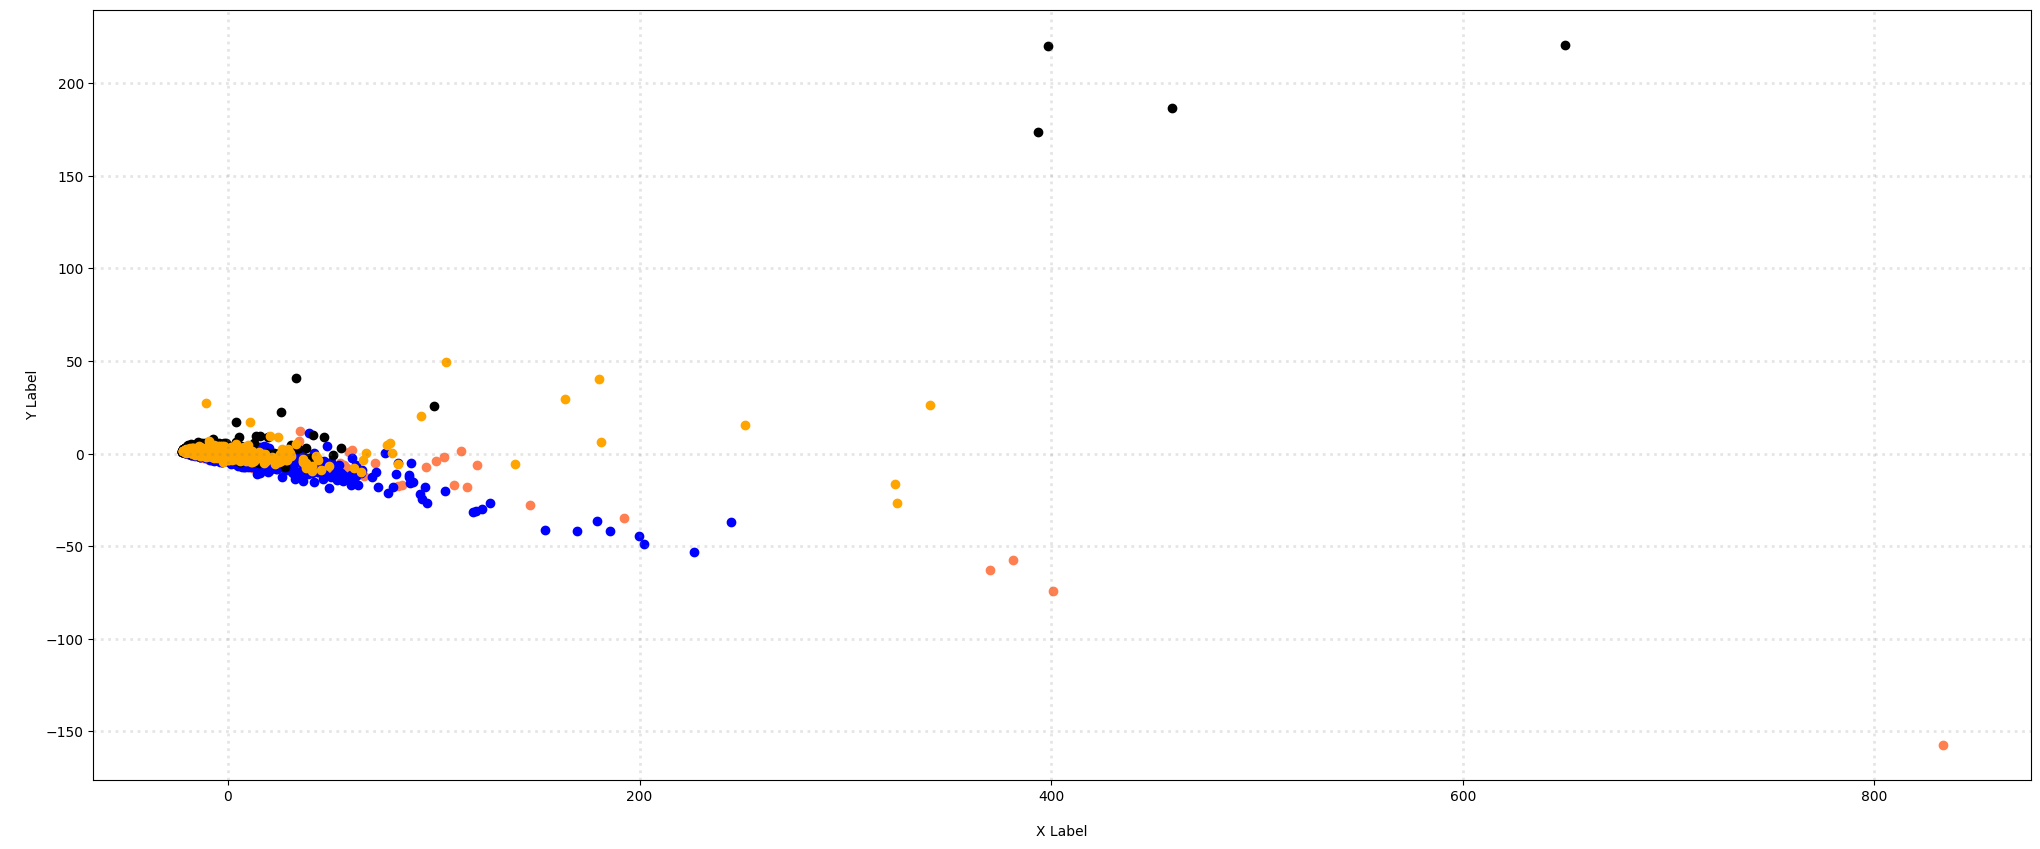

In [91]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [92]:
# Answer here
%matplotlib inline
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

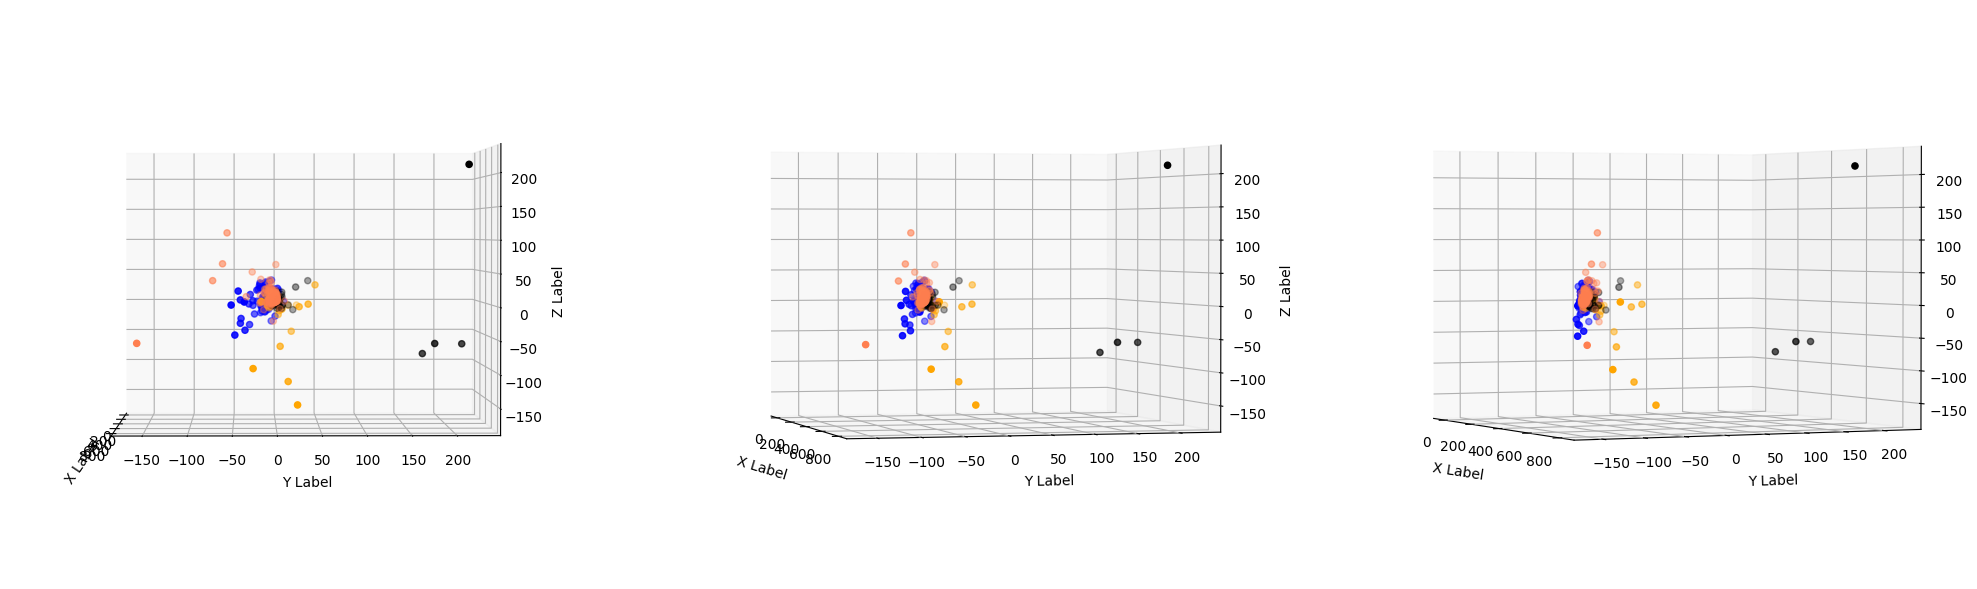

In [93]:

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,11))
ax = fig.add_subplot(1,3,1, projection='3d')  #畫在第一列 第一格
ay = fig.add_subplot(1,3,2, projection='3d')  #畫在第一列 第2格
az = fig.add_subplot(1,3,3, projection='3d')  #畫在第一列 第3格


for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c ,marker='o')
    az.scatter(xs, ys, zs, c = c ,marker='o')
    ay.scatter(xs, ys, zs, c = c ,marker='o')


ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ay.set_xlabel('\nX Label')
ay.set_ylabel('\nY Label')
ay.set_zlabel('\nZ Label')

az.set_xlabel('\nX Label')
az.set_ylabel('\nY Label')
az.set_zlabel('\nZ Label')

ax.view_init(1,-1)   #旋轉視角
ay.view_init(1,-15)
az.view_init(1,-25)

plt.show()

---

### 5.5 Attribute Transformation / Aggregation


![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

# 這裡是第三個我認為能改進的地方
正如我敘述所說
note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
我認為
可以依照我們想要看到的詞語數量，來決定需要把多少加起來，不用每次都把全部算出來畢竟我們可能，不會一次用到所有term_frequency
修改如下:

In [94]:
term_frequencies = []
num=300 #改這裡決定我們要算多少term，因為下面用到300 所以先用300
for j in range(0,num):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    

In [97]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
# [3 8 5 2 5 8 2 5 3 2]

In [98]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [99]:
term_frequencies[0] #sum of first term

134

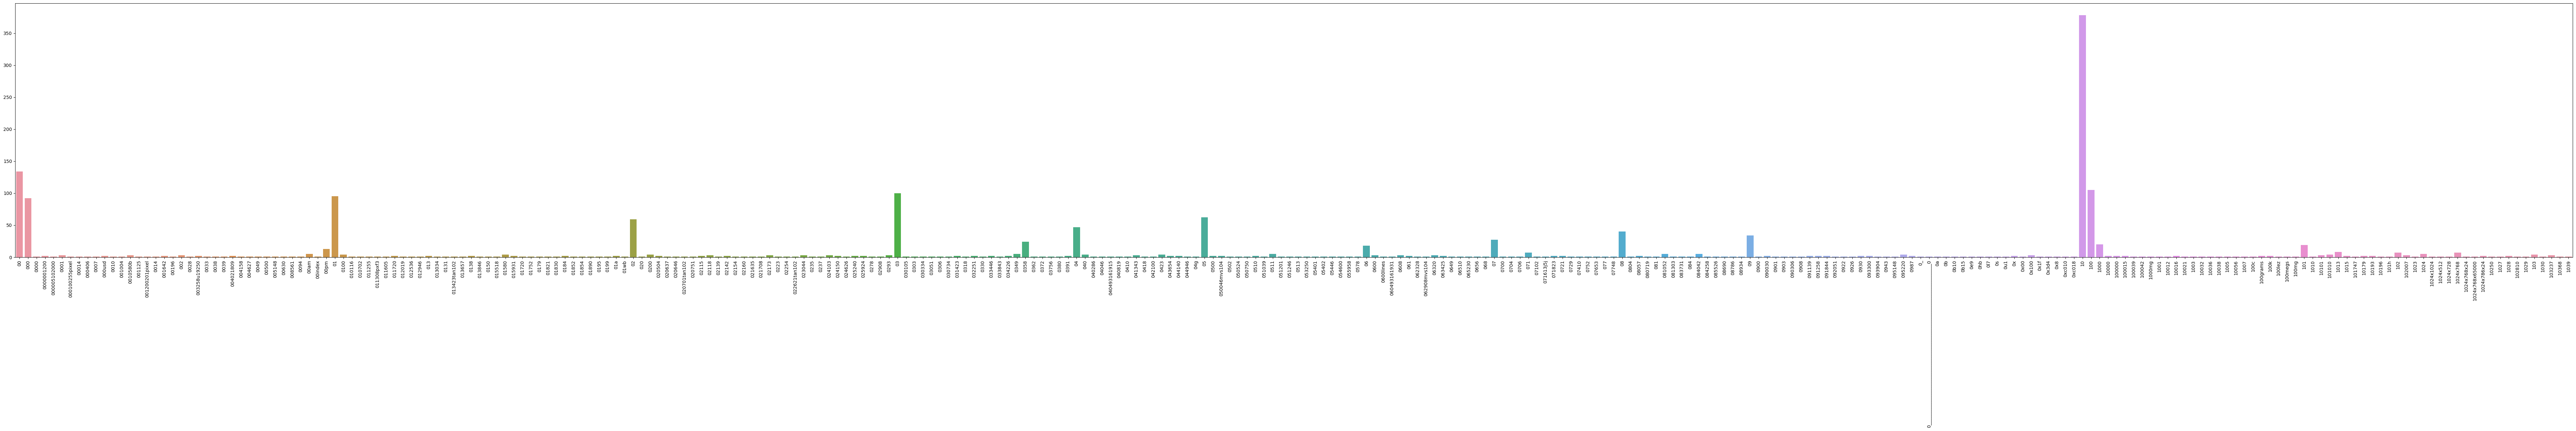

In [100]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [100]:
# Answer here
import plotly.offline as py
import plotly.graph_objs as go

data= [go.Bar(
        x=count_vect.get_feature_names_out()[:300],#X軸˙
        y=term_frequencies[:300], #y軸欄位
       

        textposition = 'auto', #長條圖上標示資料數值的位子，有auto、inside、outside可以做設定
        marker=dict(
        color='rgb(158,202,225)', #長條圖填滿部分顏色設定
        line=dict(color='rgb(8,48,107)')) #長條圖外框顏色設定
)]

layout=go.Layout(
   title='Term_frequency', titlefont=dict(
         size=22, color='#7f7f7f'), #設定標題名稱、字體大小、顏色
    xaxis=dict(
        tickfont=dict(
            size=6, color='rgb(107, 107, 107)') #設定X軸名稱、字體大小、顏色
    ),
    yaxis=dict(
        tickfont=dict(
            size=8,color='rgb(107, 107, 107)' #設定Y軸標籤字體大小、顏色
        )
    ),margin=go.Margin(l=180,r=60,b=50,t=60,pad=0,) #調整圖表的位子
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='grouped-bar')

E:\env\py39\lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin


E:\env\py39\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `grouped-bar` didn't end with .html. Adding .html to the end of your file.



'grouped-bar.html'

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [101]:
# Answer here
#透過 找出平均值，作為threshold篩選出相對重要的term

name=np.array(count_vect.get_feature_names())
high_pass=[]
for t,z in zip(name[0:],term_frequencies[0:]):
    if z>20:
        high_pass.append([t,z])
c=[i[0] for i in high_pass] #名稱
d=[i[1] for i in high_pass] #頻率

data= [go.Bar(
        y=d[:300], #y軸欄位
        x=c[:300], #x軸欄位

        textposition = 'auto', #長條圖上標示資料數值的位子，有auto、inside、outside可以做設定
        marker=dict(
        color='rgb(158,202,225)', #長條圖填滿部分顏色設定
        line=dict(color='rgb(8,48,107)')) #長條圖外框顏色設定
)]

layout=go.Layout(
   title='Term_frequency_threshold', titlefont=dict(
         size=22, color='#7f7f7f'), #設定標題名稱、字體大小、顏色
    xaxis=dict(
        tickfont=dict(
            size=16, color='rgb(107, 107, 107)') #設定X軸名稱、字體大小、顏色
    ),
    yaxis=dict(
        tickfont=dict(
            size=8,color='rgb(107, 107, 107)' #設定Y軸標籤字體大小、顏色
        )
    ),margin=go.Margin(l=180,r=60,b=50,t=60,pad=0,) #調整圖表的位子
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='grouped-bar')

E:\env\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



'grouped-bar.html'

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

E:\env\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[['00', 134], ['000', 92], ['0000', 1], ['0000001200', 2], ['000005102000', 1]]


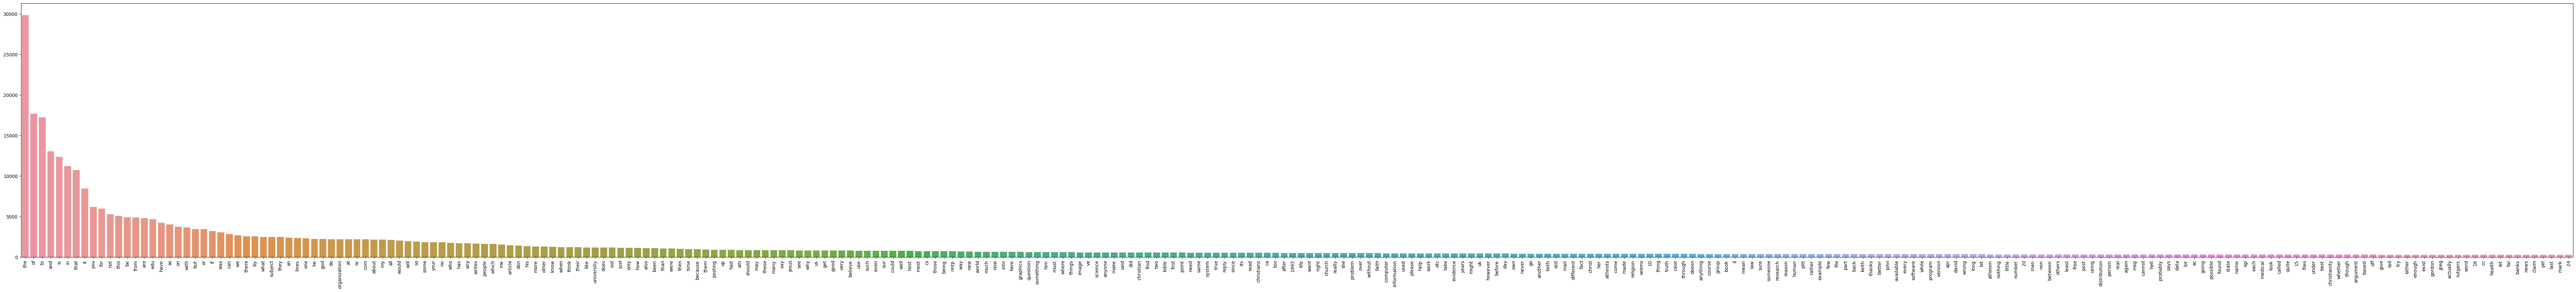

In [101]:
# Answer here
news=[]
name=np.array(count_vect.get_feature_names())
for t,z in zip(name[0:],term_frequencies[0:]):
    news.append([t,z])
    
print(news[0:5])
news_sort=sorted(news,key=lambda row:(row[1]),reverse=True)
news_sort[0:5]
a=[i[0] for i in news_sort]
b=[i[1] for i in news_sort]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=a[:300], 
            y=b[:300])
g.set_xticklabels(a[:300], rotation = 90);

---

In [102]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

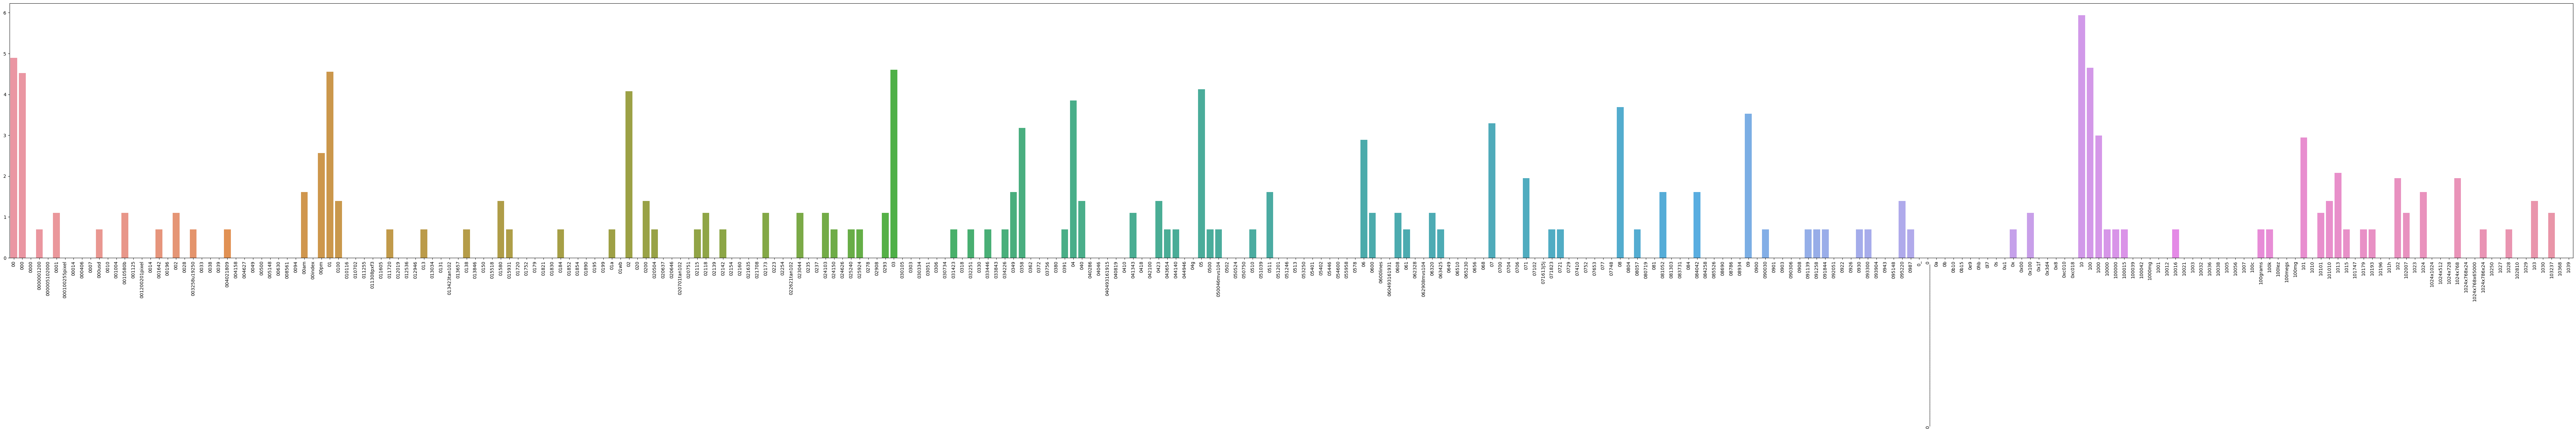

In [103]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### 5.6 Discretization and Binarization
 

In [104]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [105]:
mlb = preprocessing.LabelBinarizer()

In [106]:
mlb.fit(X.category)

LabelBinarizer()

In [107]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [108]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [109]:
# Answer here
#yes

mlb.fit(X.category_name)
X['bin_category2'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category2
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

# 最後一個，我覺得有機會改得更有意義的地方
因為是隨機選擇，這樣拿來比較的情況下如果category都不同，比較出來的相似度或許比較沒有意義
所以我認為應該可以稍微過濾，在選比較文本的時候先挑出相同category的文本，
這樣可以看出，同種類的文本之間，相似度是否真的很高。
改進如下:

In [110]:
test=X[X['category_name']=='sci.med']

In [117]:
#再做一次隨機取樣
document_to_transform_1 = []
random_record_1 = test.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = test.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = test.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [118]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: myers@cs.scarolina.edu (Daniel Myers) Subject: Re: Is MSG sensitivity superstition? Organization: USC  Department of Computer Science Lines: 39  Frequently of late, I have been reacting to something added to restaurant foods.  What happens is that the inside of my throat starts to feel "puffy", like I have a cold, and also at times the inside of my mouth (especially the tongue) and lips also feel puffy.  The situations around these symptoms almost always involve restaurants (usually chinese), the most notable cases:  a cheap chinese fast food chain, a japanese steak house (I had the steak), and another chinese fast food chain where I SAW the cook put about a tablespoon or two of what looked like sugar or salt into my fried rice.  I am under the impression that MSG "enhances" flavor by causing the taste buds to swell.  If this is correct, I do not find it unreasonable to assume that high doses of MSG can cause other mouth tissues to swell.  Also, as the many of the occurances (i

In [119]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [120]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.263384
Cosine Similarity using count bw 1 and 3: 0.667486
Cosine Similarity using count bw 2 and 3: 0.380056
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


那由結果，我們可以看到，不盡然比較好，說明，同分類的email不一定直觀的相似，但我認為這是一個有意思的嘗試~

---------

# 以下是課堂原本的

In [111]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [112]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [113]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [114]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---

# NEW DATA!

In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import helpers.data_mining_helpers as dmh
%matplotlib inline

In [3]:
file = open('amazon_cells_labelled.txt', mode='r')

In [4]:
print(file.read())

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

# Import Data
導入三個data 並且 concat 前兩個(為了後面貝式分類器我們留一組做TEST

In [5]:
file=pd.read_csv('amazon_cells_labelled.txt',sep='\t',header=None)

In [6]:
file

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [7]:
file1=pd.read_csv('imdb_labelled.txt',sep='\t',header=None)
file1

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [8]:
file2=pd.read_csv('yelp_labelled.txt',sep='\t',header=None)
file2

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [9]:
res=pd.concat([file,file1],axis=0,ignore_index=True)
res

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
1743,I just got bored watching Jessice Lange take h...,0
1744,"Unfortunately, any virtue in this film's produ...",0
1745,"In a word, it is embarrassing.",0
1746,Exceptionally bad!,0


In [10]:
res.columns=['sentence','category']
res

,sentence,category
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
1743,I just got bored watching Jessice Lange take h...,0
1744,"Unfortunately, any virtue in this film's produ...",0
1745,"In a word, it is embarrassing.",0
1746,Exceptionally bad!,0


# Add columne
把0 1改成 positve and negative 增加可讀性

In [11]:
category_name=['negative','positive']
res['category_name'] = None
res

,sentence,category,category_name
0,So there is no way for me to plug it in here i...,0,None
1,"Good case, Excellent value.",1,None
2,Great for the jawbone.,1,None
3,Tied to charger for conversations lasting more...,0,None
4,The mic is great.,1,None
...,...,...,...
1743,I just got bored watching Jessice Lange take h...,0,None
1744,"Unfortunately, any virtue in this film's produ...",0,None
1745,"In a word, it is embarrassing.",0,None
1746,Exceptionally bad!,0,None


In [12]:
i=0
for t in res['category']:
    res['category_name'][i]=category_name[t]
    i+=1

C:\Users\oscar\AppData\Local\Temp\ipykernel_15100\1367221191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['category_name'][i]=category_name[t]


In [13]:
res

,sentence,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
1743,I just got bored watching Jessice Lange take h...,0,negative
1744,"Unfortunately, any virtue in this film's produ...",0,negative
1745,"In a word, it is embarrassing.",0,negative
1746,Exceptionally bad!,0,negative


#  Missing Values check

In [14]:
res.isnull()

,sentence,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1743,False,False,False
1744,False,False,False
1745,False,False,False
1746,False,False,False


In [17]:
res.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0)

,sentence,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


# Duplicate Data check

In [18]:
res.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1743    False
1744    False
1745    False
1746    False
1747    False
Length: 1748, dtype: bool

In [19]:
sum(res.duplicated())

13

In [20]:
sum(res.duplicated('sentence')) #有重複,dealing with it

13

In [21]:
len(res)

1748

In [22]:
res.drop_duplicates(keep='first', inplace=True) # 重複資料僅保留一筆

In [23]:
len(res) #扣掉了13筆

1735

#  Data Preprocessing

## Sampling

In [24]:
res_samp=res.sample(n=800) #取 1200 的sample 
res_samp[0:4]

,sentence,category,category_name
1664,Excellent short film.,1,positive
1713,The incredible soundtrack truly captures the e...,1,positive
1435,I know that Jim O'Connor was very energetic an...,0,negative
276,I wasted my little money with this earpiece.,0,negative


positive    877
negative    858
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

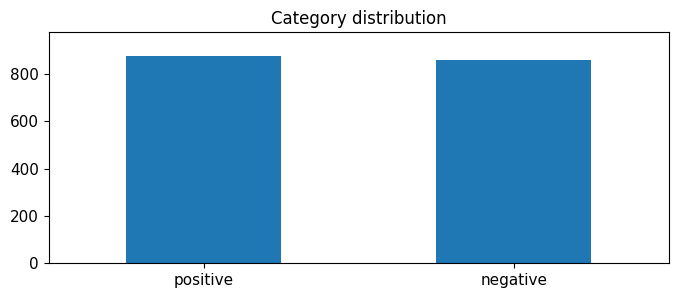

In [25]:
print(res.category_name.value_counts())
x=max(res.category_name.value_counts())
# plot barchart for X
res.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0,x+100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

可以看到取的結果符合平均

877
positive    406
negative    394
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

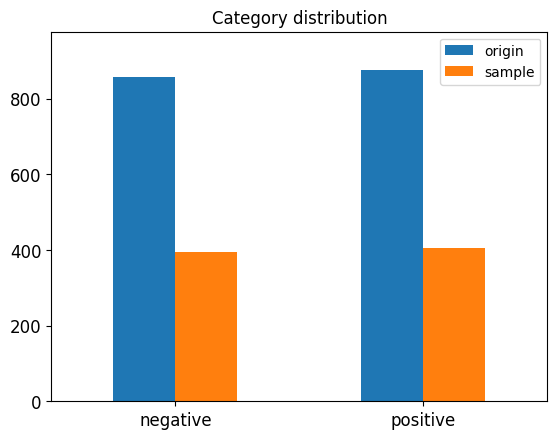

In [26]:
#分開長條圖

print(res.category_name.value_counts().max())
print(res_samp.category_name.value_counts())

disp = pd.concat([res.category_name.value_counts(), res_samp.category_name.value_counts()], axis=1, sort=True)
disp.columns = ["origin", "sample"]

disp.plot(kind = 'bar',title = 'Category distribution',ylim = [0, res.category_name.value_counts().max()+100],
         rot = 0, fontsize = 12)

# Feature Creation

In [27]:
import nltk
# takes a like a minute or two to process
res['unigrams'] = res['sentence'].apply(lambda res: dmh.tokenize_text(res))
res[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [28]:
res

,sentence,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"
...,...,...,...,...
1743,I just got bored watching Jessice Lange take h...,0,negative,"[I, just, got, bored, watching, Jessice, Lange..."
1744,"Unfortunately, any virtue in this film's produ...",0,negative,"[Unfortunately, ,, any, virtue, in, this, film..."
1745,"In a word, it is embarrassing.",0,negative,"[In, a, word, ,, it, is, embarrassing, .]"
1746,Exceptionally bad!,0,negative,"[Exceptionally, bad, !]"


# Feature subset selection

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
res_counts = count_vect.fit_transform(res.sentence) #learn the vocabulary and return document-term matrix
print(res_counts[0:])

  (0, 3293)	1
  (0, 3594)	1
  (0, 1915)	1
  (0, 2416)	1
  (0, 3960)	1
  (0, 1441)	1
  (0, 2235)	1
  (0, 3653)	1
  (0, 2679)	1
  (0, 1920)	1
  (0, 1817)	2
  (0, 1693)	1
  (0, 3581)	1
  (0, 3845)	1
  (0, 3811)	1
  (0, 1567)	1
  (0, 506)	1
  (0, 801)	1
  (1, 1574)	1
  (1, 552)	1
  (1, 1256)	1
  (1, 3868)	1
  (2, 1441)	1
  (2, 3581)	1
  (2, 1593)	1
  :	:
  (1731, 1377)	1
  (1731, 2764)	1
  (1731, 3104)	1
  (1731, 3901)	1
  (1731, 2910)	1
  (1732, 1915)	1
  (1732, 1920)	1
  (1732, 1817)	1
  (1732, 1171)	1
  (1732, 4049)	1
  (1733, 308)	1
  (1733, 1261)	1
  (1734, 3653)	1
  (1734, 1817)	1
  (1734, 2462)	1
  (1734, 2482)	1
  (1734, 2314)	1
  (1734, 3947)	1
  (1734, 184)	1
  (1734, 151)	2
  (1734, 1763)	1
  (1734, 182)	1
  (1734, 1924)	1
  (1734, 1877)	1
  (1734, 1872)	1


In [30]:
# We can check the shape of this matrix by:
res_counts.shape

(1735, 4100)

In [31]:
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18'],
      dtype=object)

# FEATURE Visualization

In [32]:
# we convert from sparse array to normal array
res_counts[0:5, 0:100].toarray()

res_count_list=res_counts.toarray().tolist()

term_frequencies = []
for j in range(0,res_counts.shape[1]):
    term_frequencies.append(sum(res_counts[:,j].toarray()))


In [33]:
res_count_list.insert(0,term_frequencies)                       #DOC-1=term_frequency Doc-2=term_name
res_count_list.insert(0,count_vect.get_feature_names_out())

ans_df=pd.DataFrame(res_count_list) #先把res_count_list轉DF 方便我做排序
ans_df.index=['doc'+str(i-2) for i in range(1737)] #重設index name

#印出來看看
ans_df

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,4096,4097,4098,4099
doc-2,10,100,11,12,13,15,15g,15pm,17,18,...,your,yourself,youthful,youtube,yun,z500a,zero,zillion,zombie,zombiez
doc-1,[31],[1],[1],[2],[3],[2],[1],[1],[1],[1],...,[56],[1],[1],[1],[1],[1],[1],[1],[2],[1]
doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc1730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#把陣列按詞頻 排序

rslt_df = ans_df.sort_values(by = ['doc-1'], axis = 1,ascending = False) #排序好後可以得到RSLT_DF
rslt_df

,3581,184,1920,1915,3605,2462,3653,1817,3943,3579,...,1720,1721,1722,1724,1728,1733,1734,1736,1737,4099
doc-2,the,and,it,is,this,of,to,in,was,that,...,ho,hockey,hoffman,holder,hollander,homework,honest,hook,hoot,zombiez
doc-1,[1367],[745],[636],[581],[497],[497],[449],[291],[276],[247],...,[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]
doc0,1,0,1,1,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc1730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1731,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
doc1732,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
plot_x = ["term_"+str(i) for i in rslt_df.loc['doc-2'][0:20]]  #取前20筆資料來看
plot_y = [i for i in list(rslt_df.index)[2:22]]
plot_z = rslt_df.iloc[2:22, 0:20].to_numpy()

C:\Users\oscar\AppData\Local\Temp\ipykernel_15100\1209286203.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plot_x = ["term_"+str(i) for i in rslt_df.loc['doc-2'][0:20]]  #取前20筆資料來看


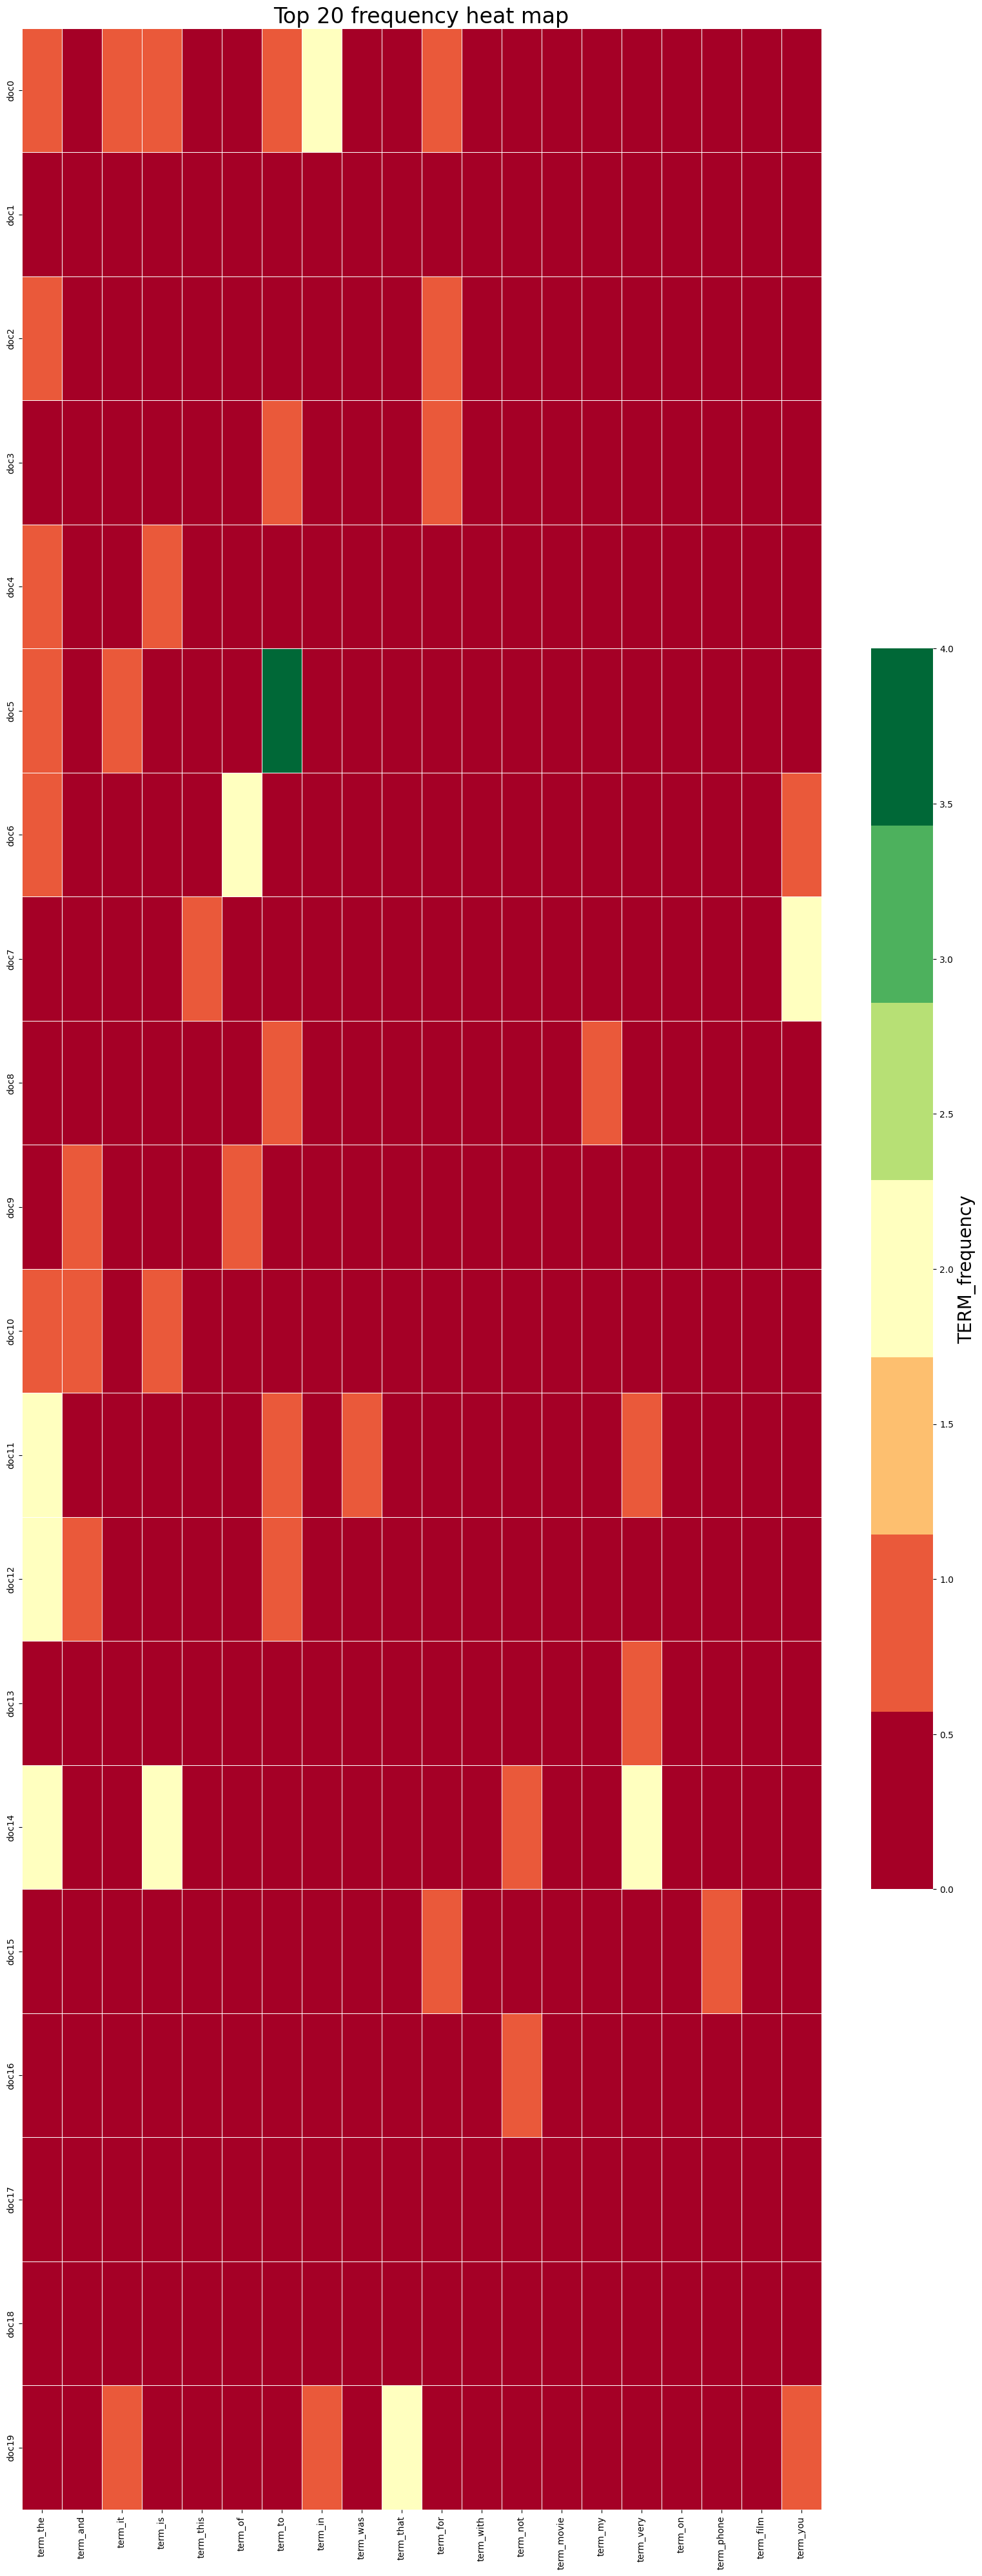

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw=df_todraw.astype('int') 


plt.figure(figsize = [20, 50]) #設定畫布大小

title = 'Top 20 frequency heat map'
plt.title(title,fontsize=24)
ax = sns.heatmap(df_todraw, fmt='f', linewidths = .5,
                 cmap = plt.cm.get_cmap('RdYlGn', 7), cbar_kws={
                     'label': 'TERM_frequency', 'shrink': 0.5})

ax.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

這個結果是表示說最常出現的前20個字中，前20筆資料包含了多少

# New Data Visualizations

## 把term frequnecy 依照label種類各自計算一個，嘗試查看哪些詞彙在該類別屬於前幾常出現

In [39]:
positive_term_f=[]
negative_term_f=[]

for i in range(0,res_counts.shape[1]):
    pos=0
    neg=0
    for j in range(0,res_counts.shape[0]):
        
        if res.iloc[j]['category'] == 1:
            pos+=res_counts[j,i]
        elif res.iloc[j]['category'] == 0:
            neg+=res_counts[j,i]
            
    positive_term_f.append(pos)
    negative_term_f.append(neg)


In [40]:
rst_p=[]
rst_n=[]

name=np.array(count_vect.get_feature_names_out())

#將名字跟freq對上
for t,z in zip(name[0:],positive_term_f[0:]):
    rst_p.append([t,z])
    
for t,z in zip(name[0:],negative_term_f[0:]):
    rst_n.append([t,z])
#排序 大到小
rst_p_sort=sorted(rst_p,key=lambda row:(row[1]),reverse=True)    
rst_n_sort=sorted(rst_n,key=lambda row:(row[1]),reverse=True)    

#再重新拆開

x1=[i[0] for i in rst_p_sort]
y1=[i[1] for i in rst_p_sort]

x2=[i[0] for i in rst_n_sort]
y2=[i[1] for i in rst_n_sort]

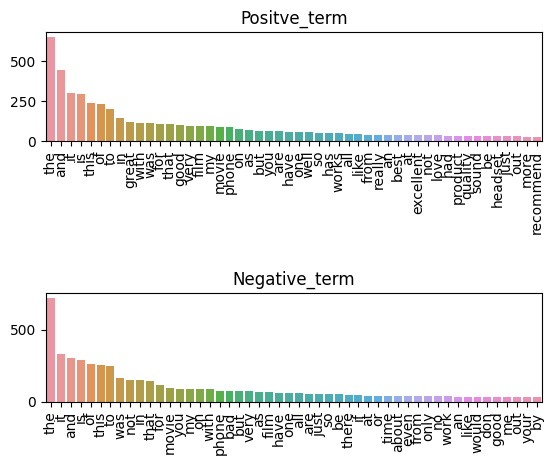

In [41]:
#做long tail觀察

fig = plt.figure()

fig.add_subplot(3,1,1)

g = sns.barplot(x=x1[:50], 
            y=y1[:50])
g.set(title='Positve_term')
g.set_xticklabels(x1[:50], rotation = 90);


fig.add_subplot(3,1,3)
g = sns.barplot(x=x2[:50], 
            y=y2[:50])
g.set(title='Negative_term')
g.set_xticklabels(x2[:50], rotation = 90);


In [42]:
print(positive_term_f[0])
print(negative_term_f[0])

20
11


# PCA 做2-D

In [43]:
from sklearn.decomposition import PCA
res_reduced = PCA(n_components = 2).fit_transform(res_counts.toarray())
res_reduced.shape

(1735, 2)

In [44]:
category_name

['negative', 'positive']

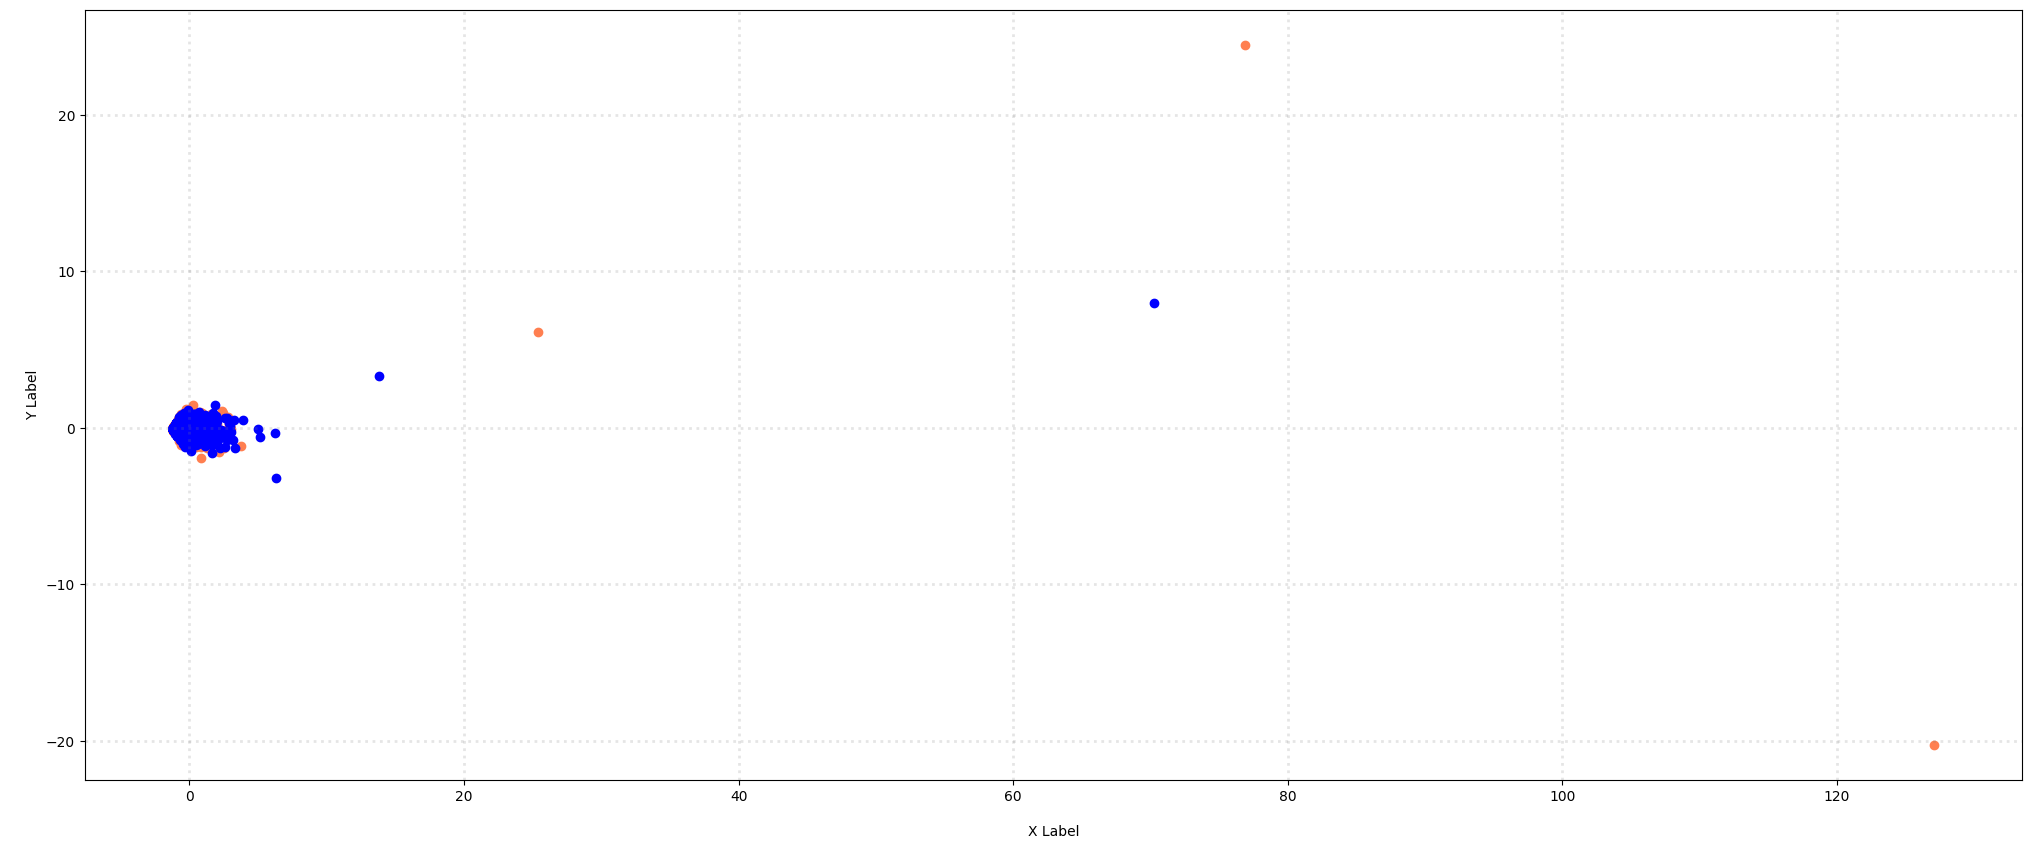

In [45]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, category_name):
    xs = res_reduced[res['category_name'] == category].T[0]
    ys = res_reduced[res['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

# PCA 3-D

In [46]:
res_reduced3D = PCA(n_components = 3).fit_transform(res_counts.toarray())

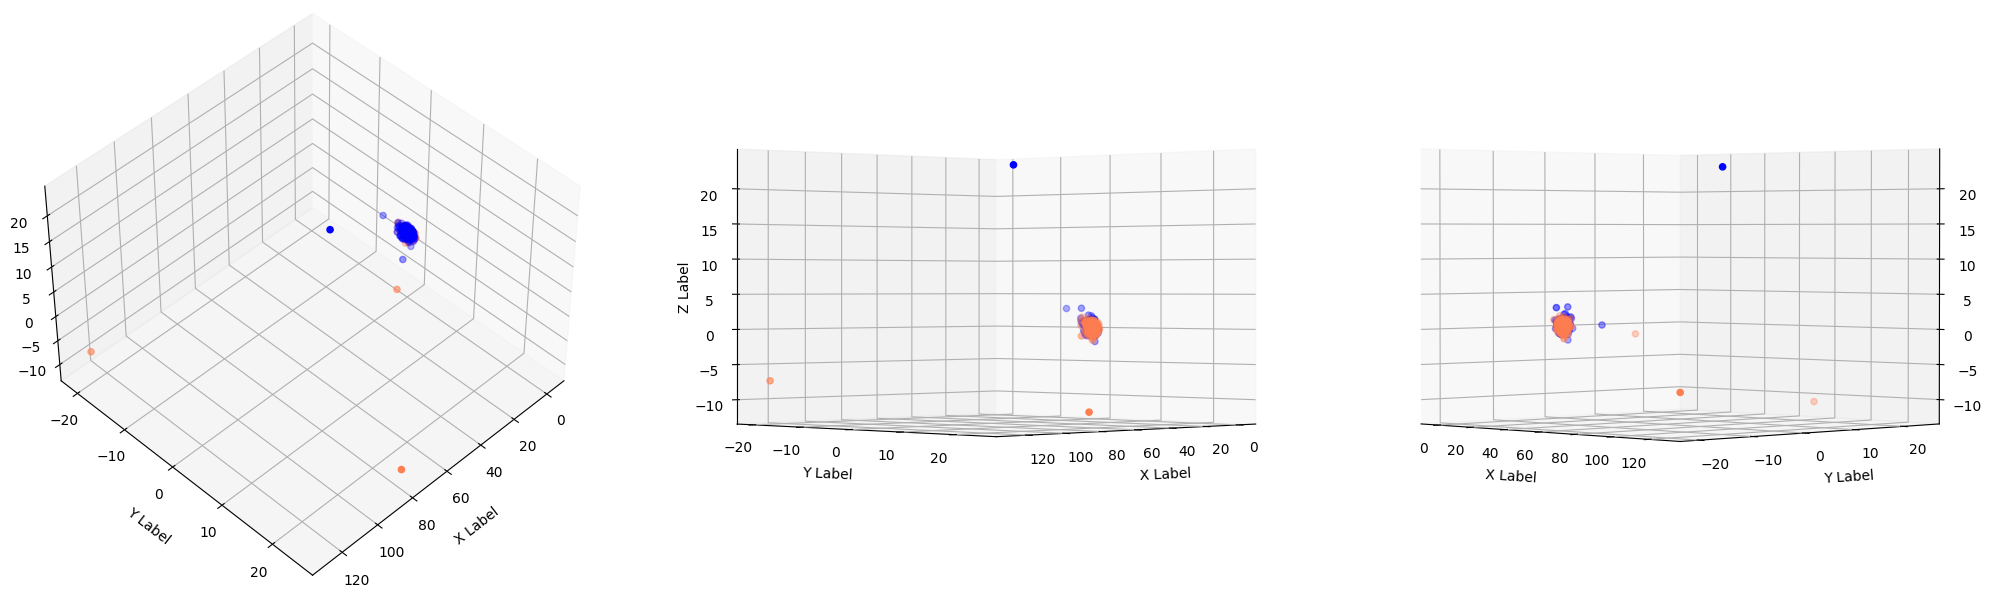

In [47]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,11))
ax = fig.add_subplot(1,3,1, projection='3d')  #畫在第一列 第一格
ay = fig.add_subplot(1,3,2, projection='3d')  #畫在第一列 第2格
az = fig.add_subplot(1,3,3, projection='3d')  #畫在第一列 第3格


for c, category in zip(col, category_name):
    xs = res_reduced3D[res['category_name'] == category].T[0]
    ys = res_reduced3D[res['category_name'] == category].T[1]
    zs = res_reduced3D[res['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c ,marker='o')
    az.scatter(xs, ys, zs, c = c ,marker='o')
    ay.scatter(xs, ys, zs, c = c ,marker='o')


ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ay.set_xlabel('\nX Label')
ay.set_ylabel('\nY Label')
ay.set_zlabel('\nZ Label')

az.set_xlabel('\nX Label')
az.set_ylabel('\nY Label')
az.set_zlabel('\nZ Label')

ax.view_init(45,45)   #旋轉視角
ay.view_init(0,45)
az.view_init(1,-45)

plt.show()

# Attribute Transformation / Aggregation

In [48]:
term_frequencies = []
term_frequencies = np.asarray(res_counts.sum(axis=0))[0]
term_frequencies #sum of first term

array([31,  1,  1, ...,  1,  2,  1], dtype=int64)

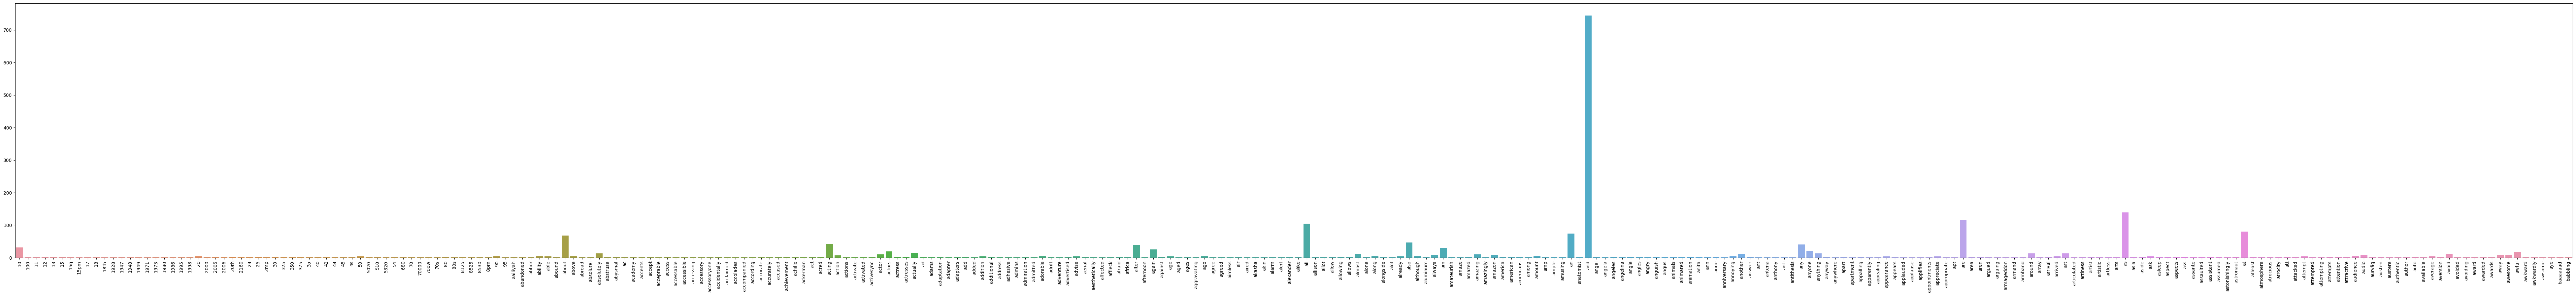

In [49]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# PLOTLY DRAW

In [50]:
import plotly.offline as py
import plotly.graph_objs as go

data= [go.Bar(
        x=count_vect.get_feature_names_out()[:300],#X軸˙
        y=term_frequencies[:300], #y軸欄位
       

        textposition = 'auto', #長條圖上標示資料數值的位子，有auto、inside、outside可以做設定
        marker=dict(
        color='rgb(158,202,225)', #長條圖填滿部分顏色設定
        line=dict(color='rgb(8,48,107)')) #長條圖外框顏色設定
)]

layout=go.Layout(
   title='Term_frequency', titlefont=dict(
         size=22, color='#7f7f7f'), #設定標題名稱、字體大小、顏色
    xaxis=dict(
        tickfont=dict(
            size=6, color='rgb(107, 107, 107)') #設定X軸名稱、字體大小、顏色
    ),
    yaxis=dict(
        tickfont=dict(
            size=8,color='rgb(107, 107, 107)' #設定Y軸標籤字體大小、顏色
        )
    ),margin=go.Margin(l=180,r=60,b=50,t=60,pad=0,) #調整圖表的位子
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='HW1_PLOTLY.html')

E:\env\py39\lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




'HW1_PLOTLY.html'

# Long tail

E:\env\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



[['10', 31], ['100', 1], ['11', 1], ['12', 2], ['13', 3]]


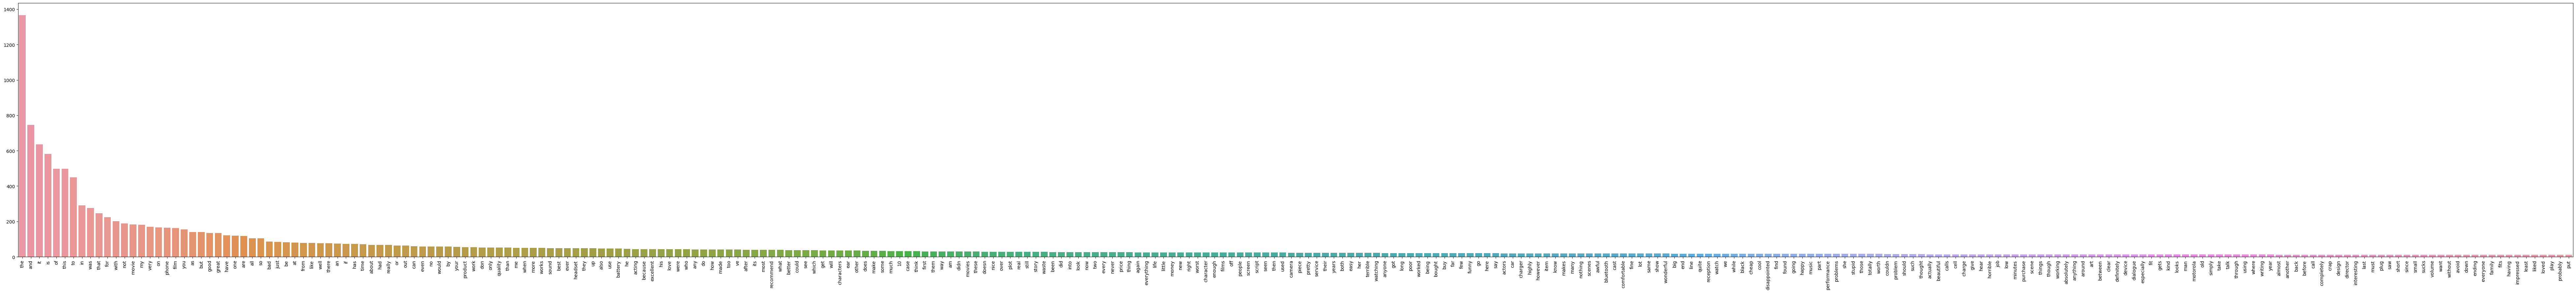

In [51]:
# Answer here
news=[] 
name=np.array(count_vect.get_feature_names())
for t,z in zip(name[0:],term_frequencies[0:]):
    news.append([t,z]) #把名稱跟累進frequency合併成一個list 方便我們做SORT
    
print(news[0:5])
news_sort=sorted(news,key=lambda row:(row[1]),reverse=True)
news_sort[0:5]
a=[i[0] for i in news_sort] #再次拆開成term 陣列
b=[i[1] for i in news_sort] #frequency陣列

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=a[:300], 
            y=b[:300])
g.set_xticklabels(a[:300], rotation = 90);

# 取LOG有效增加可視性

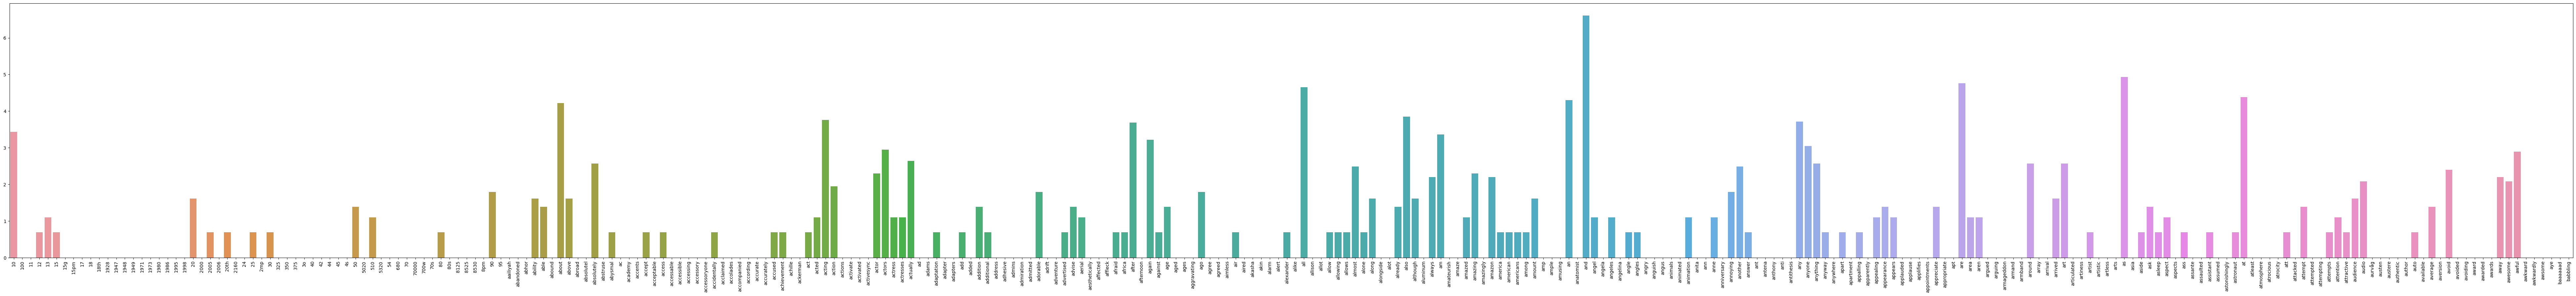

In [52]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# Discretization and Binarization

In [53]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(res.category)

LabelBinarizer()

In [54]:
res['bin_category'] = mlb.transform(res['category']).tolist()

In [55]:
res[0:9]  #因為本身就只有2種 我認為不需要特別做binary

,sentence,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


# Data Exploration

In [56]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = res.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = res.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = res.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [57]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [58]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


因為都沒有相同的字 所以similarity為0

# TF-IDF

In [60]:
#我們上面已經透過vectorizer取得了document matrix 現在直接來做TD-IDF處理
from sklearn.feature_extraction.text import TfidfTransformer
transF=TfidfTransformer()
print(transF)

TfidfTransformer()


In [61]:
res_counts

<1735x4100 sparse matrix of type '<class 'numpy.int64'>'
	with 20445 stored elements in Compressed Sparse Row format>

In [62]:
tfidf=transF.fit_transform(res_counts)

In [63]:
print(tfidf[0].toarray())
TF_ARR=tfidf.toarray()
type(TF_ARR[0][0])

[[0. 0. 0. ... 0. 0. 0.]]


numpy.float64

In [64]:
TF_ARR.shape

(1735, 4100)

# 找出TF-IDF後做naive bayes

In [65]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier_TF = MultinomialNB()
naive_bayes_classifier_TF.fit(tfidf,res['category']) #用TF-IDF 做fit

MultinomialNB()

In [66]:
test_text=file2[0] #使用file2 做test
test_label=file2[1]
X_test=count_vect.transform(test_text)

In [67]:
y_predLable = naive_bayes_classifier_TF.predict(X_test)
print(metrics.classification_report(test_label, y_predLable,target_names=['Positive', 'Negative']))


              precision    recall  f1-score   support

    Positive       0.75      0.79      0.77       500
    Negative       0.78      0.74      0.76       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



# 用frequency 做 naive bayes

In [68]:
naive_bayes_classifier_FRE = MultinomialNB()

In [69]:
naive_bayes_classifier_FRE.fit(res_counts,res['category'])

MultinomialNB()

In [70]:
test_text=file2[0] #使用file2 做test
test_label=file2[1]

In [71]:
X_test=count_vect.transform(test_text)

In [72]:
y_predLable = naive_bayes_classifier_FRE.predict(X_test)

print(metrics.classification_report(test_label, y_predLable,target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.73      0.82      0.77       500
    Negative       0.79      0.70      0.74       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



-------------------------------------------
因為：
TF-IDF的計算
會把常出現的字跟所有文本中的字做比對，看看這個單詞是否就是在某個文本中最常出現(定義為有可能決定這個LABEL的關鍵
因此相較於直接拿frequency來做分類，因為只是單純的計算了所有單詞的頻率，可能會連THE,I,WHO,這類不成決定關鍵的詞
彙也計算進去，所以理論來說經過TF-IDF的處理會得到較好的成果。